### Tools

Measere tape, encoder, Arduino, Arduino IDE, bubble line level.

https://youtu.be/V7J-ILo3Ppc this video shows how we conducted video. (I was took vide).

To compare, experiemntal and theoretical values I just compared visually using plots. This is the most easy way of comparing two graphs.

As you see our experimental and theoretical values doesn't look similar. It is because of wrong inclusion of frinction and air drag in Newton-Euler equation.

Aknowledgements:
1. Mikhail, Ekaterina: plan how to collect data, wrote code for gathering raw data using Arduino
2. Timur, Leonid, Elina: conduct experiment, measure objects
3. Ahmed: generated .xls files + some measurements

### Parse experimental vals

In [251]:
import csv
import matplotlib.pyplot as plt
import numpy as np
TESTS = 3
ANGLES = [15, 45, -135]

In [252]:
def read_csv_to_arrays(filename):
    time_diff = []
    position = []
    angle = []

    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            time_diff.append(float(row['time_diff']))
            position.append(float(row['position']))
            angle.append(float(row['angle']))

    return time_diff, position, angle

In [253]:
def calculate_angular_velocity(angle, time_diff):
    angular_velocity = []
    for i in range(1, len(angle)):
        delta_angle = angle[i] - angle[i - 1]
        delta_time = time_diff[i]
        angular_velocity.append(delta_angle / delta_time)
    return angular_velocity

def calculate_velocity(position, time_diff):
    velocity = []
    for i in range(1, len(position)):
        delta_position = position[i] - position[i - 1]
        delta_time = time_diff[i]
        velocity.append(delta_position / delta_time)
    return velocity


In [254]:
# Function to plot data
def plot_data(time, position, angle, velocity, angular_velocity, leg):
    

    time = time.reshape(-1)
    position = position.reshape(-1)
    angle = angle.reshape(-1)
    velocity = velocity.reshape(-1)
    angular_velocity = angular_velocity.reshape(-1)
    
    plt.subplots(figsize=(20, 15))
    
    # Plot position
    plt.subplot(2, 2, 1)
    plt.xlabel('Time Difference')
    plt.ylabel('Position')
    plt.title('Position vs Time')
    plt.plot(time, position, label=leg)
    plt.legend()
    plt.grid()
    
    # Plot Angle
    plt.subplot(2, 2, 2)
    plt.xlabel('Time Difference')
    plt.ylabel('Angle')
    plt.title('Angle vs Time')
    plt.plot(time, angle, label=leg)
    plt.legend()
    plt.grid()

    # Plot Velocity of Position
    plt.subplot(2, 2, 3)
    plt.xlabel('Time Difference')
    plt.ylabel('Velocity')
    plt.title('Velocity of Position vs Time')
    plt.plot(time[:-1], velocity, label=leg)
    plt.legend()
    plt.grid()

    # Plot Angular Velocity
    plt.subplot(2, 2, 4)
    plt.xlabel('Time Difference')
    plt.ylabel('Angular Velocity')
    plt.title('Angular Velocity vs Time')
    plt.plot(time[:-1], angular_velocity, label=leg)
    plt.legend()
    
    plt.grid()
    plt.show()


In [273]:
# Function to plot data
def plot_data_double(time, position_r, position_t, angle_r, angle_t, velocity_r, velocity_t, angular_velocity_r, angular_velocity_t):
    
    lab = "real"
    lab_t = "theoretical"
    time = time.reshape(-1)
    position = position_r.reshape(-1)
    angle = angle_r.reshape(-1)
    velocity = velocity_r.reshape(-1)
    angular_velocity = angular_velocity_r.reshape(-1)
    
    plt.subplots(figsize=(20, 15))
    
    # Plot position
    plt.subplot(2, 2, 1)
    plt.xlabel('Time Difference')
    plt.ylabel('Position')
    plt.title('Position vs Time')
    plt.plot(time, position_r, label=lab)
    plt.plot(time, position_t, label=lab_t)
    plt.legend()
    plt.grid()
    
    # Plot Angle
    plt.subplot(2, 2, 2)
    plt.xlabel('Time Difference')
    plt.ylabel('Angle')
    plt.title('Angle vs Time')
    plt.plot(time, angle_r, label=lab)
    plt.plot(time, angle_t, label=lab_t)
    plt.legend()
    plt.grid()

    # Plot Velocity of Position
    plt.subplot(2, 2, 3)
    plt.xlabel('Time Difference')
    plt.ylabel('Velocity')
    plt.title('Velocity of Position vs Time')
    plt.plot(time, velocity_r, label=lab)
    plt.plot(time[:-1], velocity_t, label=lab_t)
    plt.legend()
    plt.grid()

    # Plot Angular Velocity
    plt.subplot(2, 2, 4)
    plt.xlabel('Time Difference')
    plt.ylabel('Angular Velocity')
    plt.title('Angular Velocity vs Time')
    plt.plot(time, angular_velocity_r, label=lab)
    plt.plot(time[:-1], angular_velocity_t, label=lab_t)
    plt.legend()
    
    plt.grid()
    plt.show()


In [256]:
def avegare(array):
    # Calculate average along the first axis
    average_array = np.mean(array, axis=0)

    # Reshape the result to have shape (1, 196)
    average_array = average_array.reshape(1, -1)

    return average_array


Position Array Shape: (1, 196)
Angle Array Shape: (1, 196)
Time Difference Array Shape: (3, 196)
Time Array Shape: (1, 196)


/tmp/ipykernel_50320/1457732440.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


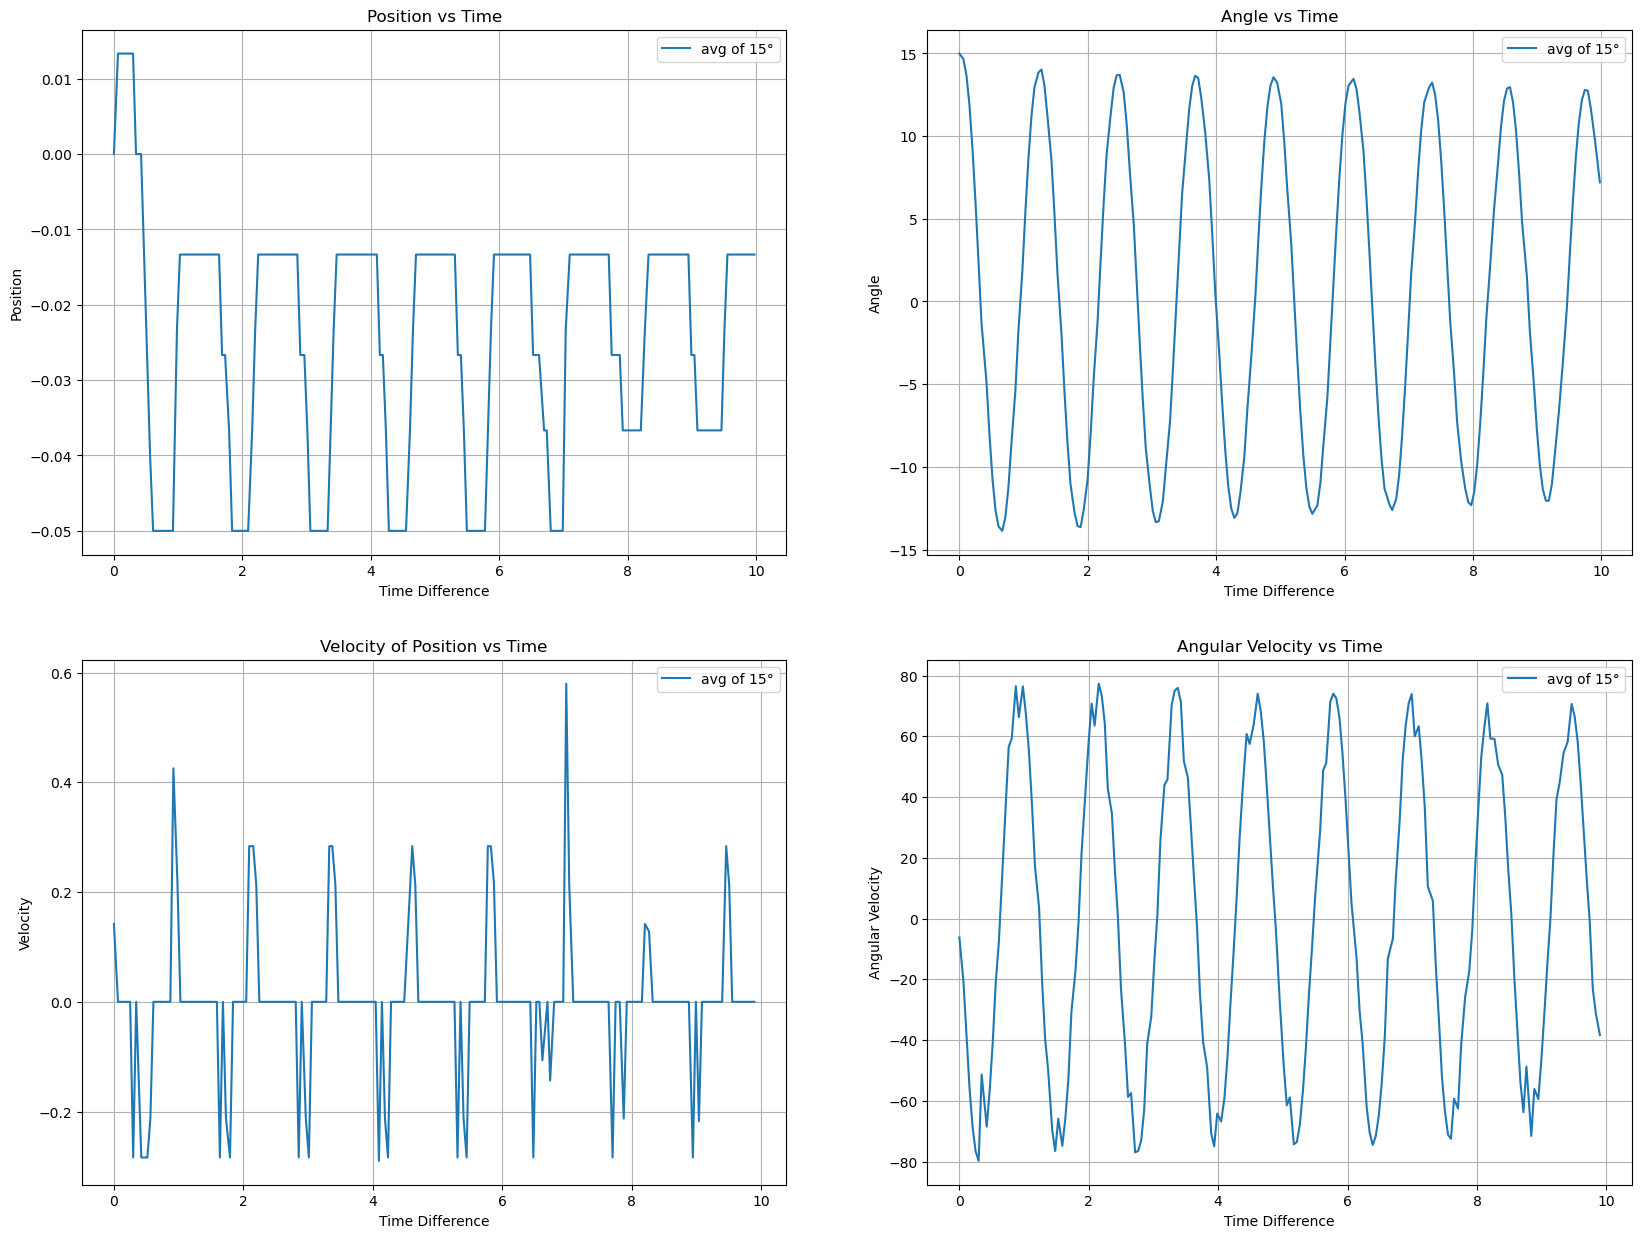

/tmp/ipykernel_50320/329227665.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  angular_velocity.append(delta_angle / delta_time)
/tmp/ipykernel_50320/329227665.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  velocity.append(delta_position / delta_time)


Position Array Shape: (1, 196)
Angle Array Shape: (1, 196)
Time Difference Array Shape: (3, 196)
Time Array Shape: (1, 196)


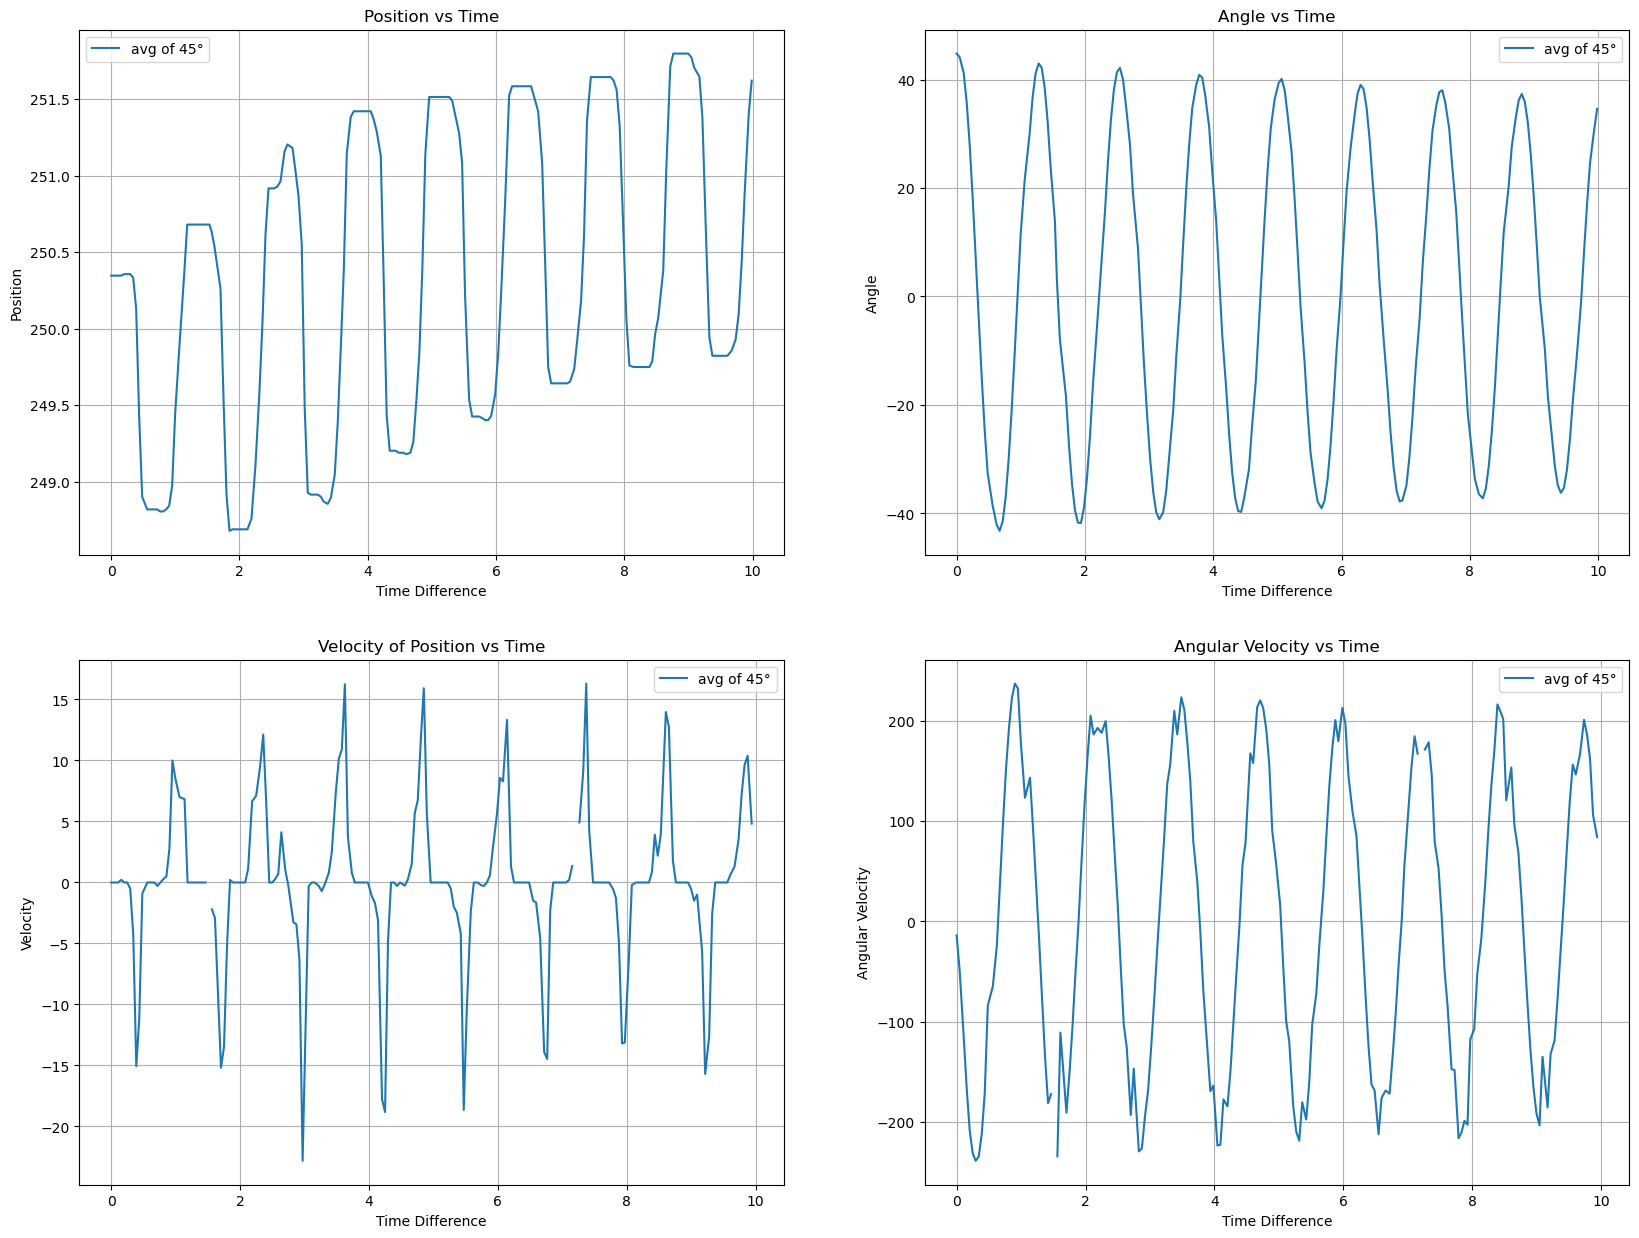

Position Array Shape: (1, 196)
Angle Array Shape: (1, 196)
Time Difference Array Shape: (3, 196)
Time Array Shape: (1, 196)


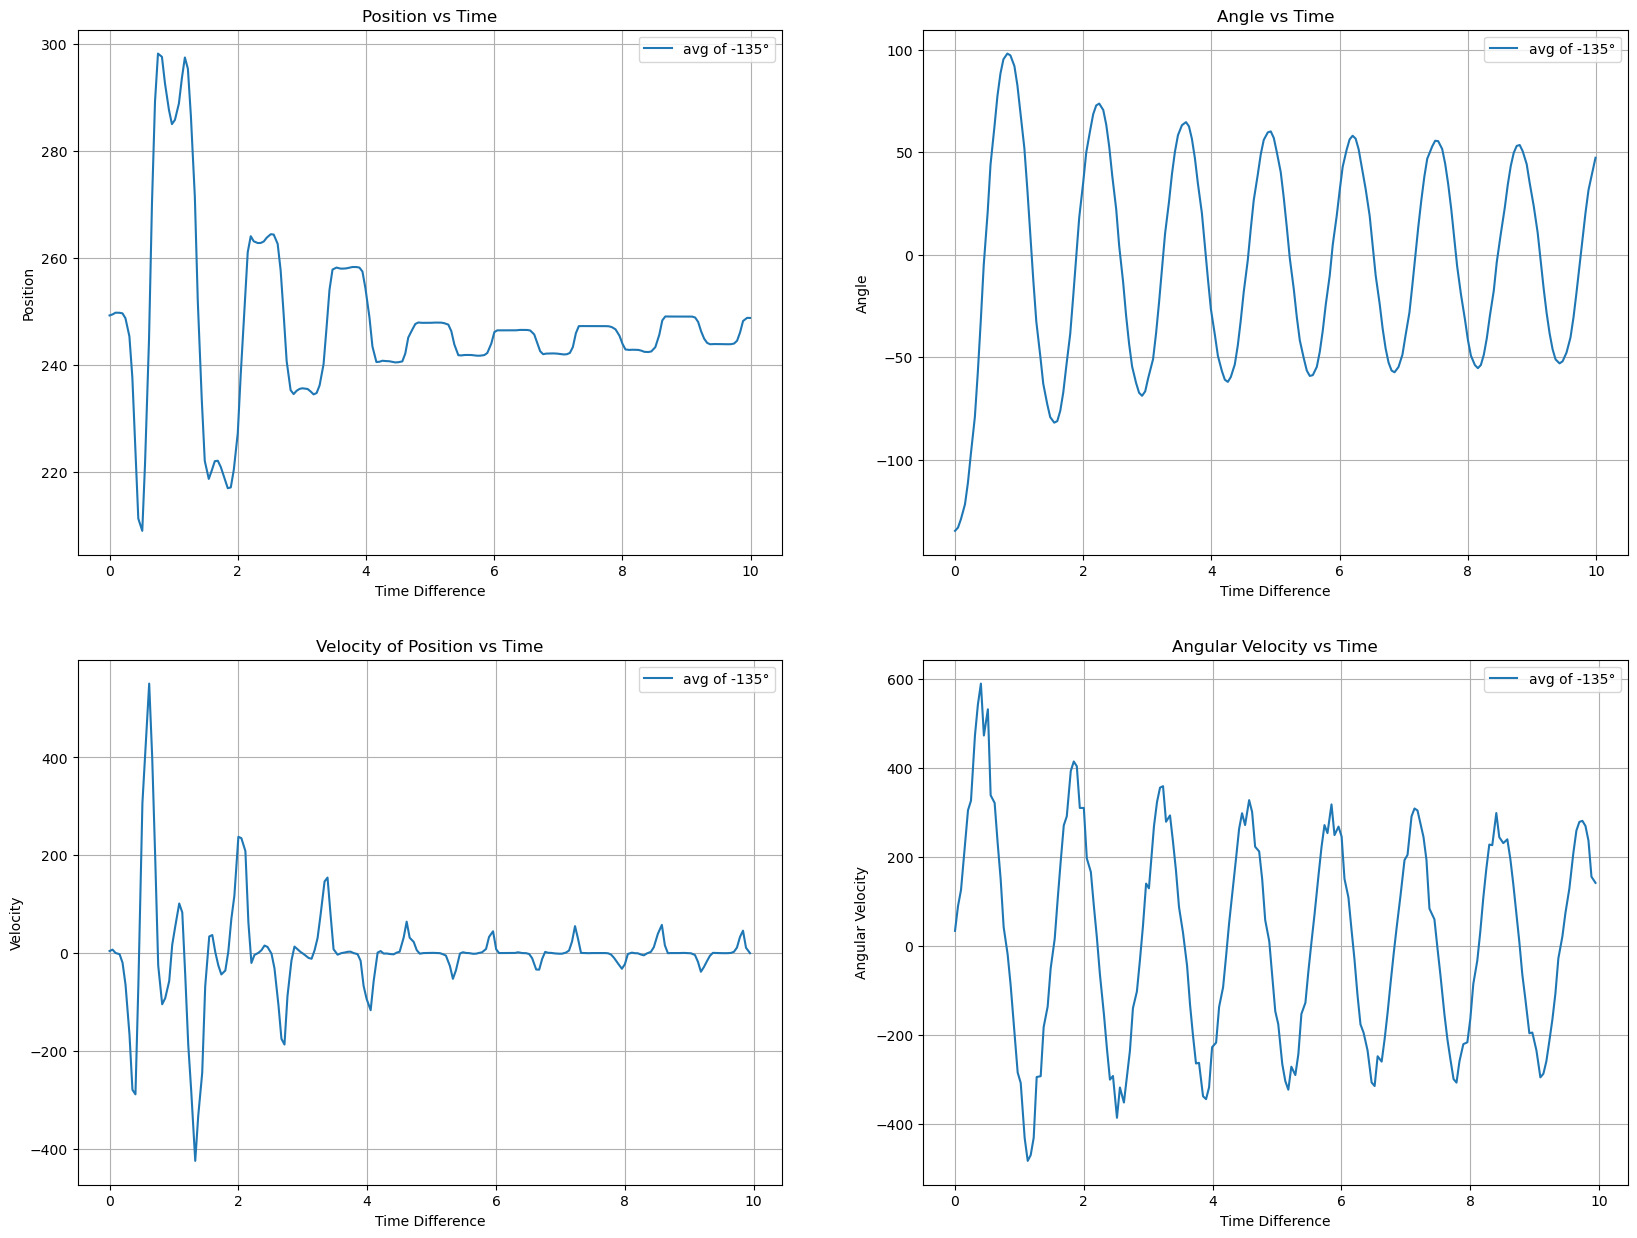

In [257]:
experimental_vals = {}

for ang in ANGLES:

    # Initialize empty arrays to store data
    position = []
    angle = []
    time_diff = []
    time = []
    
    # Iterate over the CSV files
    for j in range(TESTS):

        file_name = f'./clean/test{j+1}_{ang}.csv'

        # Read data from CSV file
        t, p, a = read_csv_to_arrays(file_name)
        
        # Append data to respective lists
        time_diff.append(t)
        position.append(p)
        angle.append(a)

        temp_time = [0]
        for i in range(1, len(t)):
            temp_time.append(temp_time[i-1] + t[i])
        time.append(temp_time)

    # Convert lists to numpy arrays
    time_diff = np.array(time_diff)
    position = np.array(position)
    angle = np.array(angle)
    time = np.array(time)


    angular_velocity = []
    velocity = []

    for j in range(TESTS):
        angular_velocity.append(calculate_angular_velocity(angle[j], time_diff[j]))
        velocity.append(calculate_velocity(position[j], time_diff[j]))

    angular_velocity = np.array(angular_velocity)
    velocity = np.array(velocity)

    avg_time = avegare(time)
    avg_position = avegare(position) 
    avg_angle = avegare(angle) 
    avg_velocity = avegare(velocity) 
    avg_angular_velocity = avegare(angular_velocity)

    experimental_vals[ang] = [avg_position, avg_angle, avg_velocity, avg_angular_velocity]

    print("Position Array Shape:", avg_position.shape)
    print("Angle Array Shape:", avg_angle.shape)
    print("Time Difference Array Shape:", time_diff.shape)
    print("Time Array Shape:", avg_time.shape)
    
    
    plot_data(avg_time, avg_position, avg_angle, avg_velocity, avg_angular_velocity, leg=f'avg of {ang}°')


### Compare real vs. experiemtn

In [258]:

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import ode
from sympy import Symbol, Point2D, Point3D, Derivative, Function, Eq,cos,sin
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import Polygon, Circle
from scipy.integrate import solve_ivp
from sympy.physics.mechanics import init_vprinting
init_vprinting()
from IPython.display import HTML, display

In [269]:
m1 = 0.266  # kg
m2 = 0.154  # kg
l = 380   # mm
g = 9810  # mm/s^2
c1 = 0.01 # air drag
c2 = 15# friction

    
# Function defining the equations of motion
def equations(t, y):
    phi, phi_dot, x, x_dot = y
    phi_double_dot = (
        -g * m1 * np.sin(phi) - g * m2 * np.sin(phi) -
        l * m2 * np.sin(phi) * np.cos(phi) * phi_dot**2
    ) / (
        l * (m1 + m2 * (np.sin(phi)**2))
    ) - c1*phi_dot
    x_double_dot = (
        g * m2 * np.sin(phi) * np.cos(phi) +
        l * m2 * (np.sin(phi)**3) * (phi_dot**2) +
        l * m2 * np.sin(phi) *( np.cos(phi)**2) * (phi_dot**2)
    ) / (
        m1 + m2 * np.sin(phi)**2
    ) - c2*x_dot
    return [phi_dot, phi_double_dot, x_dot, x_double_dot]


196
196 196
196 196
195 196
195 196


/tmp/ipykernel_50320/575114761.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


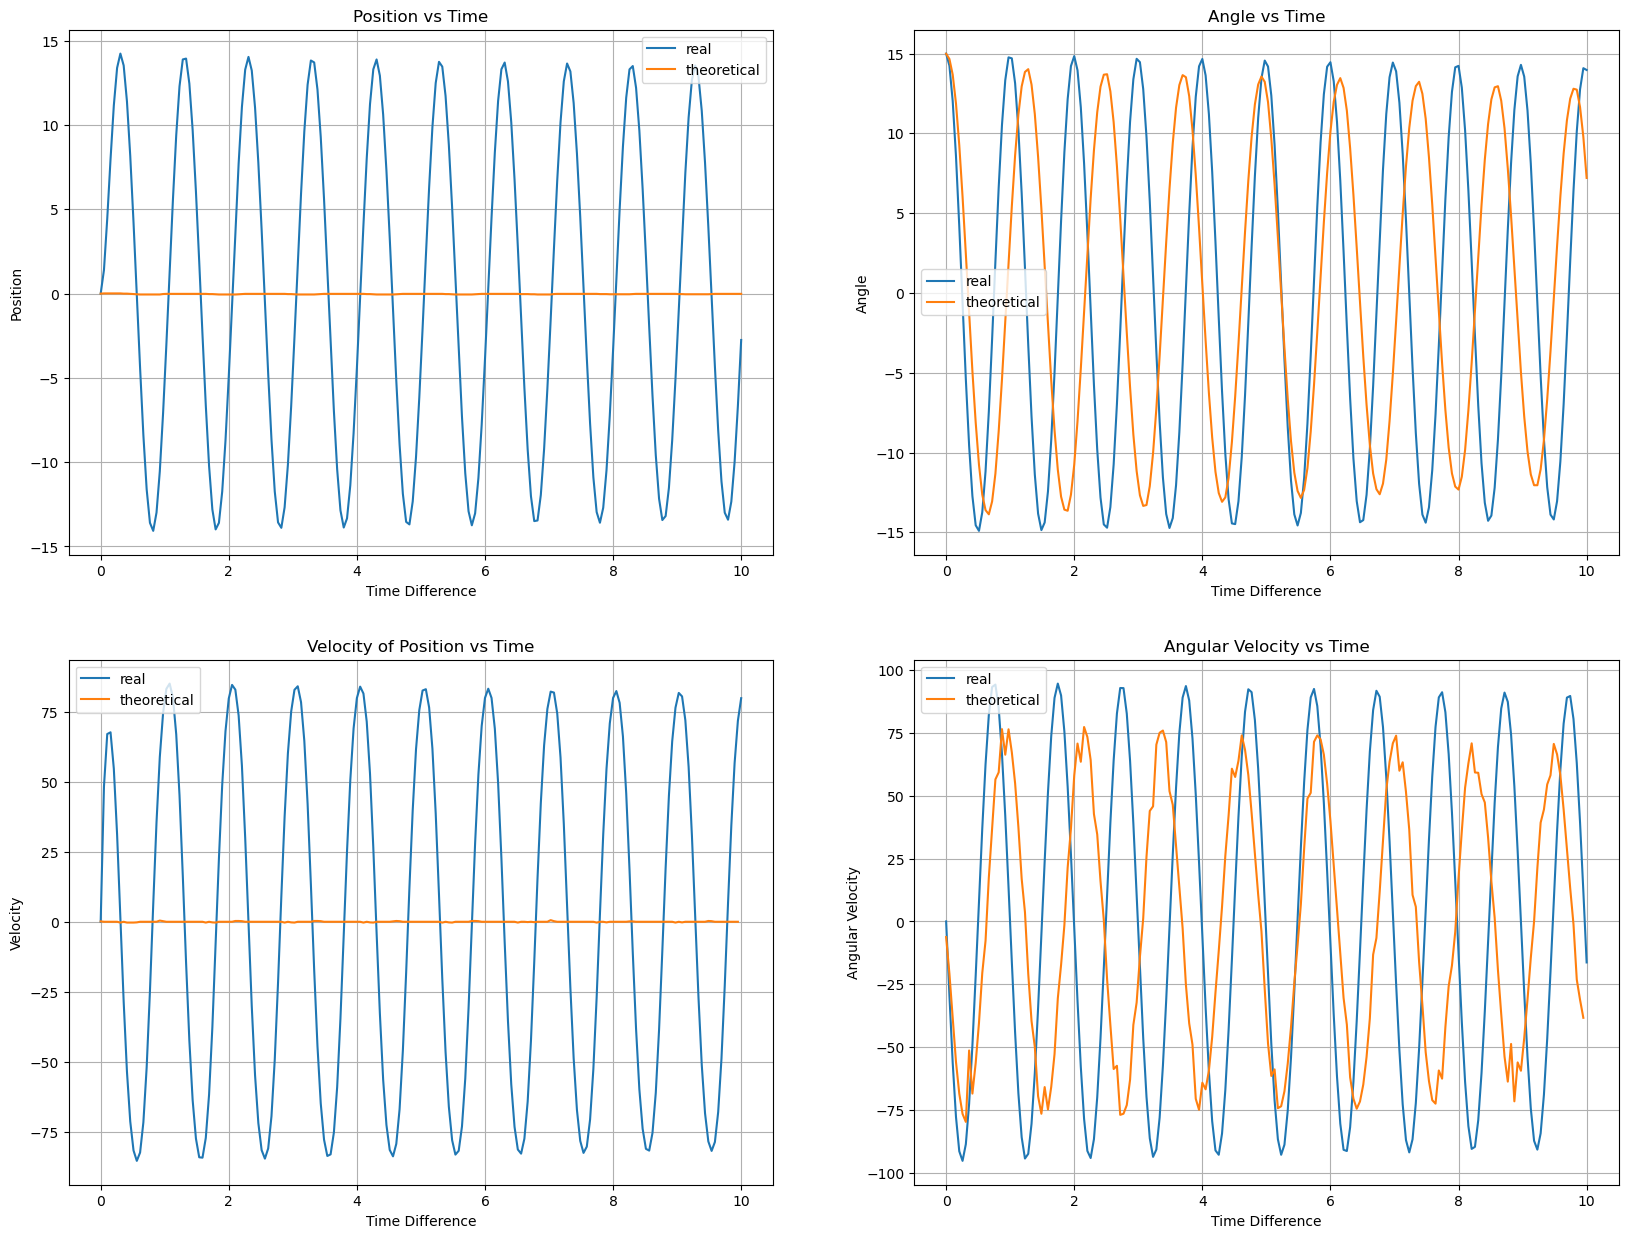

196
196 196
196 196
195 196
195 196


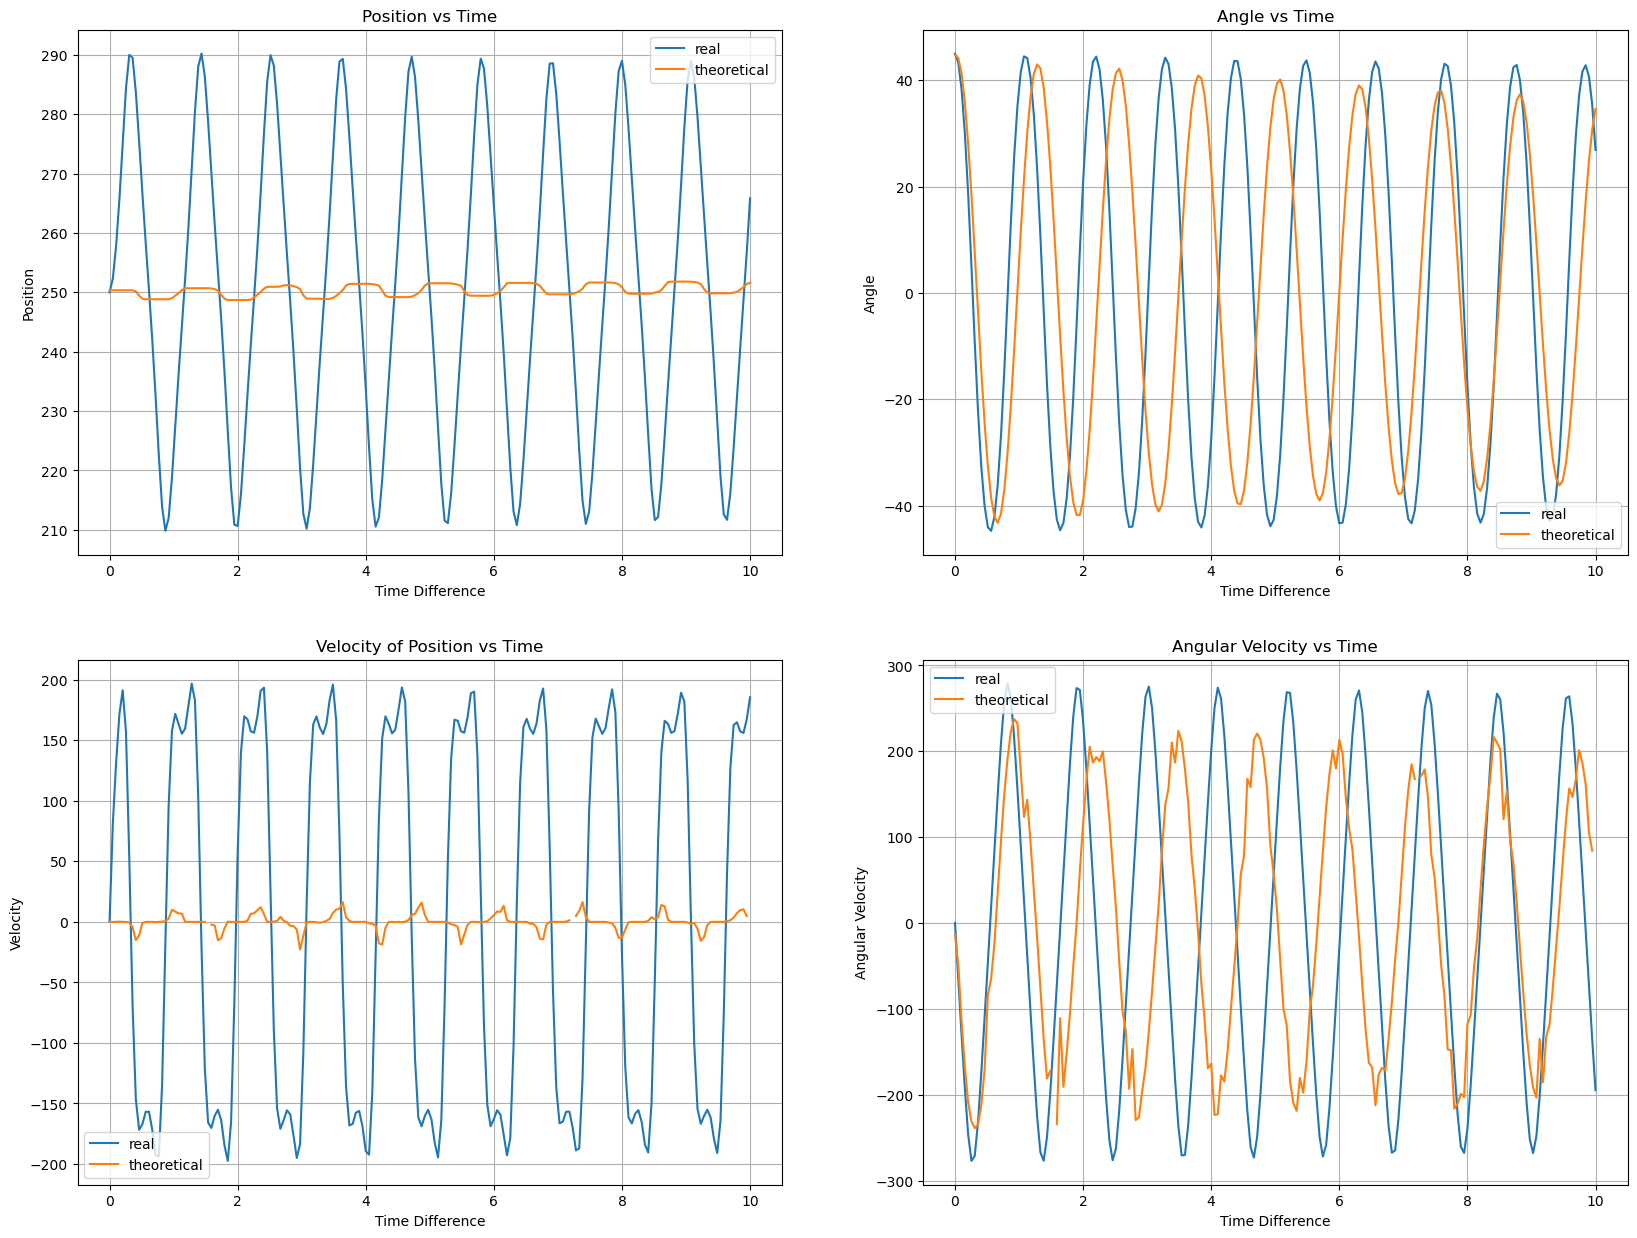

196
196 196
196 196
195 196
195 196


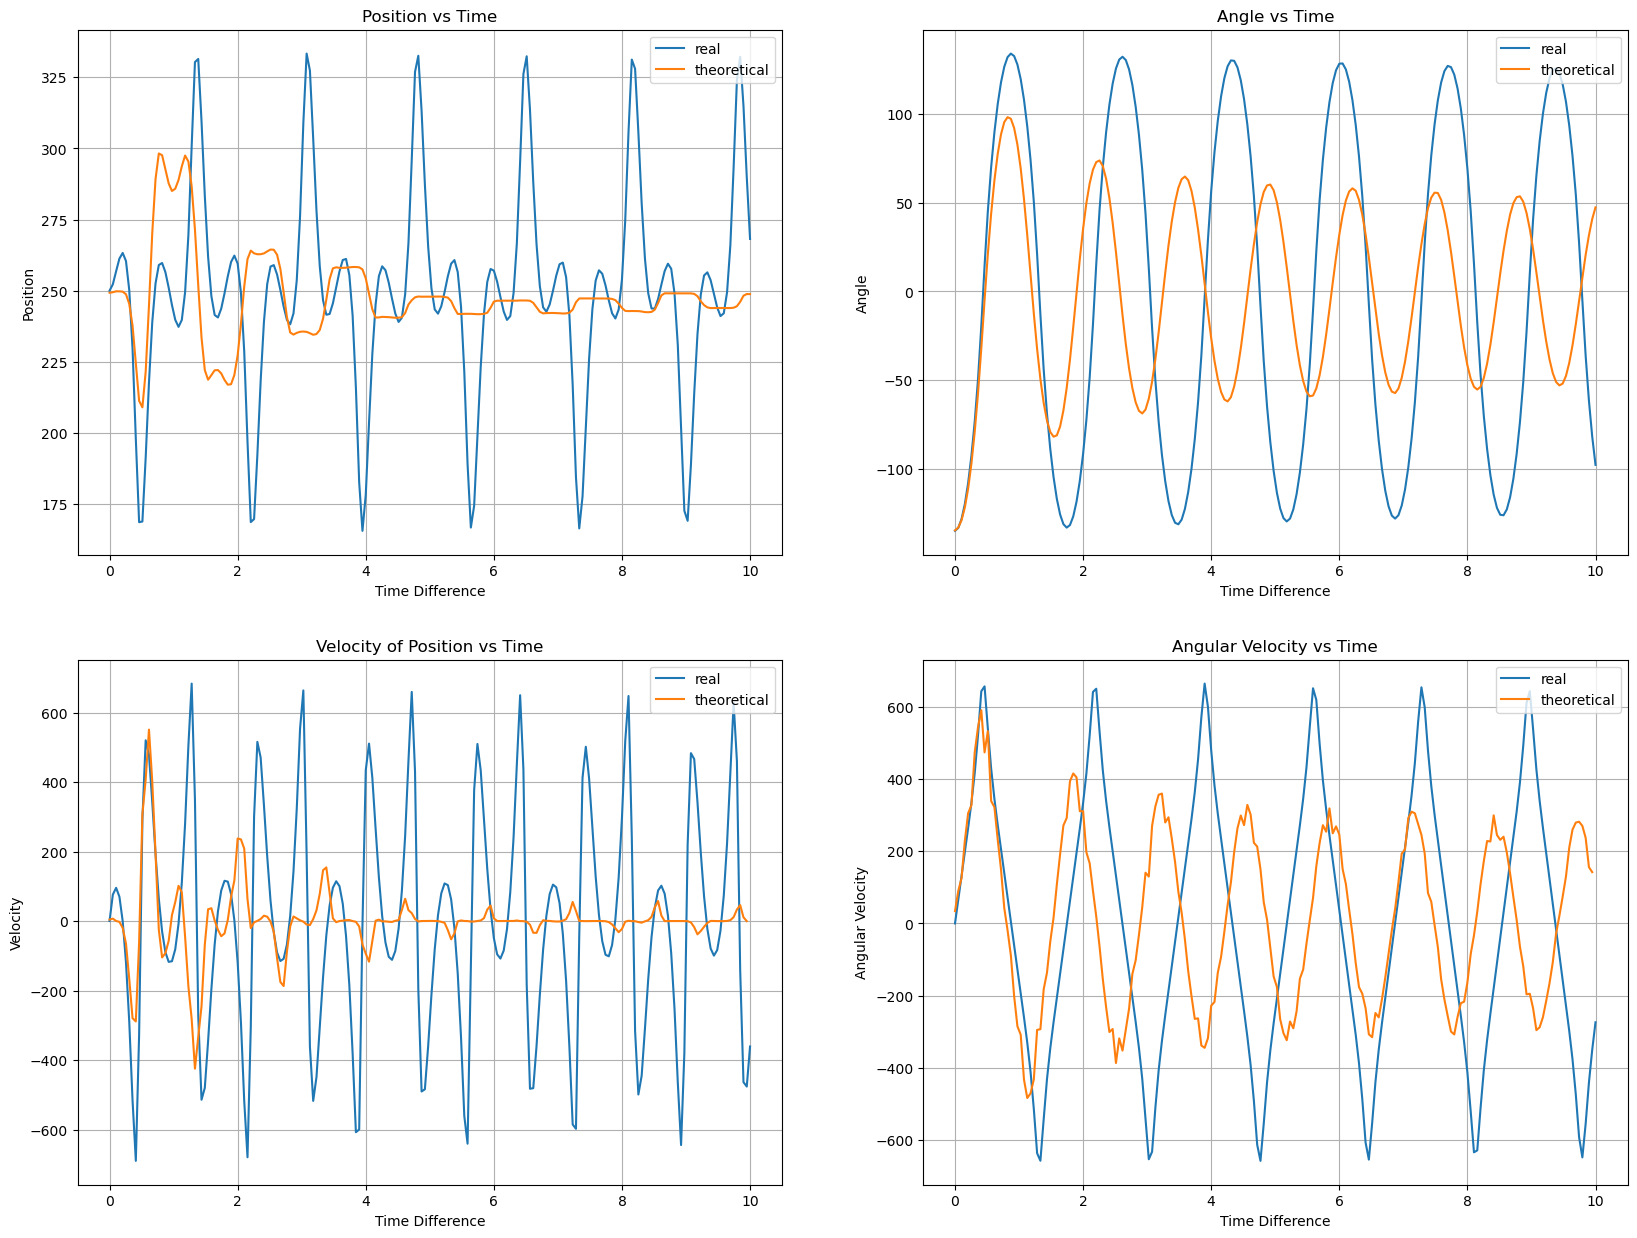

In [279]:
INITIAL_CONDITIONS = {
    15: 0,
    45: 250,
    -135: 250
}
for CURRENT_ANGLE in ANGLES:
    # Initial conditions
    phi0 = np.radians(CURRENT_ANGLE)  # Initial angle in radians
    phi_dot0 = 0      # Initial angular velocity
    x0 = INITIAL_CONDITIONS[CURRENT_ANGLE]            # Initial position
    x_dot0 = 0        # Initial velocity

    initial_conditions = [phi0, phi_dot0, x0, x_dot0]

    # Time span
    t_span = np.linspace(0, 10, 196)

    # Solve the differential equations
    sol = solve_ivp(equations, [t_span[0], t_span[-1]], initial_conditions, t_eval=t_span)

    # Extracting solutions
    phi_sol = sol.y[0]
    phi_dot_sol = sol.y[1]
    x_sol = sol.y[2]
    x_dot_sol = sol.y[3]

    # Convert angle from radians to degrees for the plot
    phi_deg = np.degrees(phi_sol)
    phi_dot_deg = np.degrees(phi_dot_sol)

    print(t_span.size)
    print(experimental_vals[CURRENT_ANGLE][0][0].size, x_sol.size)
    print(experimental_vals[CURRENT_ANGLE][1][0].size, x_dot_sol.size)
    print(experimental_vals[CURRENT_ANGLE][2][0].size, phi_deg.size)
    print(experimental_vals[CURRENT_ANGLE][3][0].size, phi_dot_deg.size)

    plot_data_double(t_span, x_sol, experimental_vals[CURRENT_ANGLE][0][0], phi_deg, experimental_vals[CURRENT_ANGLE][1][0],
                     x_dot_sol, experimental_vals[CURRENT_ANGLE][2][0], phi_dot_deg, experimental_vals[CURRENT_ANGLE][3][0])


    # # Function to update the animation
    # def update(i):
    #     cart.set_data([x_sol[i] - 0.5, x_sol[i] + 0.5], [0, 0])
    #     pole.set_data([x_sol[i], x_sol[i] + np.sin(phi_sol[i]) * l], [0, -np.cos(phi_sol[i]) * l])

    # # Create the figure and axes
    # fig, ax = plt.subplots()
    # ax.set_xlim(-2, 2)
    # ax.set_ylim(-1, 1)

    # # Create the cart and pole objects
    # cart, = ax.plot([], [], 'k', lw=2)
    # pole, = ax.plot([], [], 'r', lw=2)

    # # Set up the animation
    # ani = FuncAnimation(fig, update, frames=len(t_span), interval=10)


    # # Show the animation
    # plt.gca().set_aspect('equal', adjustable='box')
    # plt.xlabel('Position (m)')
    # plt.ylabel('Height (m)')
    # plt.title('Cart-Pole System Animation')
    # plt.grid()
    # plt.show()

    # display(HTML(ani.to_jshtml()))

    # ani.save(f"_{CURRENT_ANGLE}sim.gif")

# plt.close(fig)

As you see our experimental and theoretical values doesn't look similar. It is because of wrong inclusion of frinction and air drag in Newton-Euler equation.